In [8]:
#read the diabetes data
import pandas as pd

df = pd.read_csv('/content/diabetes2.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
y=df['Outcome']
X=df.drop('Outcome',axis=1)

In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)



In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


========== K=1 ==========
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       107
           1       0.57      0.49      0.53        47

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.73      0.73       154

Accuracy: 0.73

========== K=2 ==========
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       107
           1       0.74      0.36      0.49        47

    accuracy                           0.77       154
   macro avg       0.76      0.65      0.67       154
weighted avg       0.76      0.77      0.74       154

Accuracy: 0.77

========== K=3 ==========
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       107
           1       0.58      0.55      0.57        47

    accuracy                           0.74       154
   macro avg     

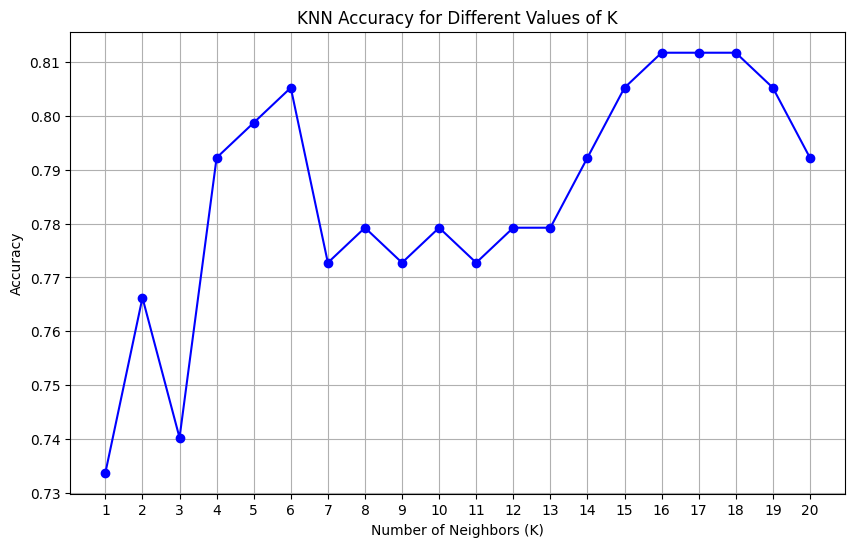

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Store results for visualization
results = []

# Iterate over values of K
for k in range(1, 21):
    # Initialize KNN with current K
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append((k, accuracy))

    # Print classification report for each K
    print(f"\n{'='*10} K={k} {'='*10}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2f}")

# Convert results to separate lists for visualization
k_values = [result[0] for result in results]
accuracies = [result[1] for result in results]

# Plot accuracy for each K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


In [26]:
#logisitic regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
#accuracy
print(accuracy_score(y_test,y_pred))
#recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

0.8246753246753247


0.6170212765957447

In [19]:
df.shape

(768, 9)